In [1]:
import time
import numpy as np
import pandas as pd
from binary_nn import BinaryNN
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

# Data Prep

In [2]:
X_train = np.loadtxt("x_train.csv")
y_train = np.loadtxt("y_train.csv")
X_test = np.loadtxt("x_test.csv")
y_test = np.loadtxt("y_test.csv")

## Reshaping

In [3]:
X_train = X_train.T
y_train = y_train.reshape(1, y_train.shape[0])
X_test = X_test.T
y_test = y_test.reshape(1, y_test.shape[0])

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(39, 4930)
(1, 4930)
(39, 2113)
(1, 2113)


## Normalization

In [5]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
norm_X_train = scaler.transform(X_train)
norm_y_train = scaler.transform(y_train)

# Binary Neural Network

In [7]:
layer_dims = [39, 20, 10, 5, 1]

In [8]:
churn_nn = BinaryNN(norm_X_train, y_train)

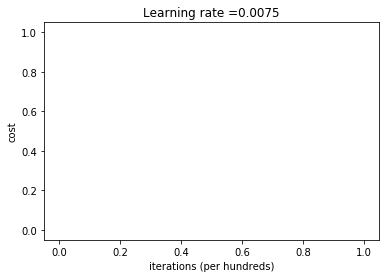

In [9]:
parameters = churn_nn.L_layer_model(layer_dimensions = layer_dims)

In [10]:
parameters

{'W1': array([[ 1.62431355e-02, -6.11789691e-03, -5.28205711e-03,
         -1.07299305e-02,  8.65379613e-03, -2.30156586e-02,
          1.74531948e-02, -7.60549129e-03,  3.19009893e-03,
         -2.49403026e-03,  1.46207456e-02, -2.06017130e-02,
         -3.22446716e-03, -3.84089479e-03,  1.13374356e-02,
         -1.09992639e-02, -1.72462429e-03, -8.77884867e-03,
          4.21786225e-04,  5.82781561e-03, -1.10064579e-02,
          1.14468859e-02,  9.01557226e-03,  5.02468378e-03,
          9.00820825e-03, -6.83762001e-03, -1.22917760e-03,
         -9.35804558e-03, -2.67920647e-03,  5.30327913e-03,
         -6.91695876e-03, -3.96786076e-03, -6.87197710e-03,
         -8.45240771e-03, -6.71281218e-03, -1.26988041e-04,
         -1.11734487e-02,  2.34387180e-03,  1.65976964e-02],
        [ 7.42044161e-03, -1.91835552e-03, -8.87628964e-03,
         -7.47158294e-03,  1.69245460e-02,  5.08077548e-04,
         -6.36995647e-03,  1.90915485e-03,  2.10025514e-02,
          1.20158952e-03,  6.1720

In [11]:
def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [12]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

## Training Accuracy

In [13]:
Z1 = np.dot(parameters["W1"], norm_X_train) + parameters["b1"]
A1 = relu(Z1)[0]
Z2 = np.dot(parameters["W2"], A1) + parameters["b2"]
A2 = relu(Z2)[0]
Z3 = np.dot(parameters["W3"], A2) + parameters["b3"]
A3 = relu(Z3)[0]
Z4 = np.dot(parameters["W4"], A3) + parameters["b4"]
A4 = sigmoid(Z4)[0]

In [14]:
A4.shape

(1, 4930)

In [15]:
A4[0][500:550]

array([0.26477354, 0.26477354, 0.26477356, 0.26477354, 0.26477354,
       0.26477366, 0.26477354, 0.26477364, 0.26477354, 0.26477354,
       0.26477354, 0.26477354, 0.26477354, 0.26477355, 0.26477354,
       0.26477354, 0.26477366, 0.26477354, 0.26477366, 0.26477357,
       0.26477355, 0.26477354, 0.26477356, 0.26477364, 0.26477354,
       0.26477354, 0.26477354, 0.26477359, 0.26477354, 0.26477354,
       0.26477356, 0.26477354, 0.26477354, 0.26477366, 0.26477354,
       0.26477366, 0.26477354, 0.26477354, 0.26477354, 0.26477354,
       0.26477354, 0.26477354, 0.26477354, 0.26477354, 0.26477354,
       0.26477354, 0.26477354, 0.26477354, 0.26477354, 0.26477354])

In [16]:
len(np.where(y_train[0] == 0)[0])

3635

In [17]:
pred_train = np.where(A4 > 0.5, 1, 0)
accuracy_score(y_train[0], pred_train[0])

0.7373225152129818

## Test Accuracy

In [18]:
y_test[0].sum() / len(y_test[0])

0.2716516800757217